<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [7]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [8]:
# Answer:
movies.duration.sort_values()

389     64
338     66
258     67
293     68
88      68
742     69
351     70
938     75
405     75
303     76
713     78
864     78
489     78
535     79
513     80
853     80
533     80
283     80
297     80
622     80
117     81
541     81
738     81
789     81
330     81
595     82
306     82
174     83
759     83
766     83
      ... 
361    181
166    182
109    183
245    184
132    186
611    187
318    188
184    188
89     189
316    189
40     189
671    191
220    191
424    193
620    194
8      195
385    197
335    197
2      200
7      201
630    202
767    205
17     207
204    212
85     216
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

In [9]:
movies[(movies.duration < 65) | (movies.duration > 241)]

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

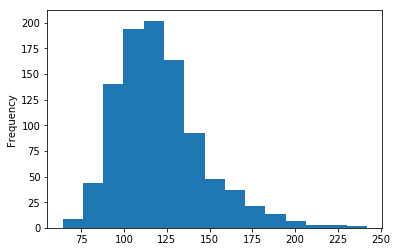

In [10]:
# Answer:
movies.duration.plot(kind= 'hist', bins = 15)

#### Use a box plot to display that same data.

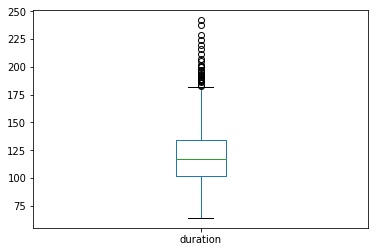

In [11]:
# Answer:
movies.duration.plot(kind= 'box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [12]:
# Answer:
movies.groupby(['content_rating'])['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

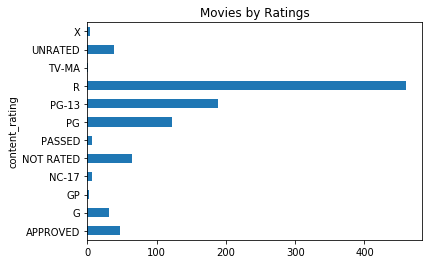

In [13]:
# Answer:
movies.groupby(['content_rating'])['title'].count().plot(kind = 'barh', title = 'Movies by Ratings', x = 'Content Ratings', y = 'Movie Counts')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [14]:
# Answer:
movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [15]:
# Answer:
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

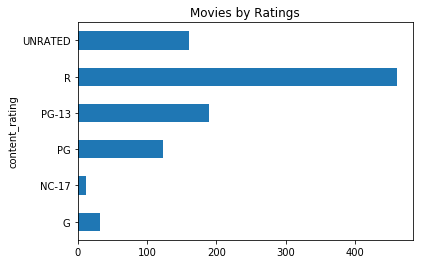

In [16]:
#To double check content ratings after replacements above:
movies.groupby(['content_rating'])['title'].count().plot(kind = 'barh', title = 'Movies by Ratings', x = 'Content Ratings', y = 'Movie Counts')

#### Count the number of missing values in each column.

In [17]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
# Answer:
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [22]:
#locate rows and fillna, sum isnull to check that null values were successfully altered
movies.loc[187] = movies.loc[187,].fillna('PG')
movies.loc[649] = movies.loc[649,].fillna('PG')
movies.loc[936] = movies.loc[936,].fillna('PG-13')
movies.content_rating.isnull().sum()

0

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [23]:
# Answer:
Over2 = movies[(movies.duration > 119)].star_rating.mean()
Under2 = movies[(movies.duration < 120)].star_rating.mean()
print("Compare avg star rating for movies 2+ hours", Over2, "vs. avg star rating for movies under 2 hours", Under2, ".", "The differnce is", Under2 - Over2,".")

Compare avg star rating for movies 2+ hours 7.948898678414082 vs. avg star rating for movies under 2 hours 7.838666666666657 . The differnce is -0.11023201174742514 .


#### Use a visualization to detect whether there is a relationship between duration and star rating.

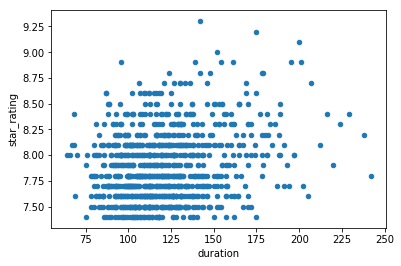

In [24]:
# Answer:
movies.plot(kind= 'scatter', x = 'duration', y = 'star_rating')

#### Calculate the average duration for each genre.

In [25]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

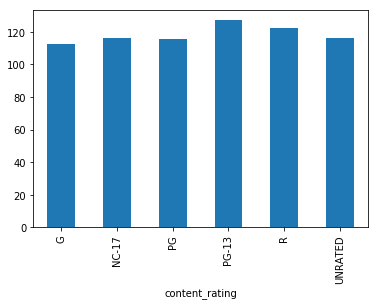

In [26]:
# Answer:
movies.groupby('content_rating').duration.mean().plot(kind='bar')

#### Determine the top rated movie (by star rating) for each genre.

In [27]:
# Answer:
movies.groupby('genre')['star_rating'].agg('max')

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [28]:
# Answer:
movies.title.value_counts().head()

The Girl with the Dragon Tattoo    2
Dracula                            2
Les Miserables                     2
True Grit                          2
Disconnect                         1
Name: title, dtype: int64

In [29]:
movies[(movies.title == 'True Grit') | (movies.title == 'Dracula') | (movies.title == 'The Girl with the Dragon Tattoo') | (movies.title == 'Les Miserables')]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [ ]:
#Answer: Titles are NOT duplicates, they are different versions

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [35]:
# Answer:
movies.groupby('genre')['star_rating'].agg(['count', 'mean'])

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


## Bonus

#### Figure out something "interesting" using the actors data!

In [31]:
movies.actors_list.value_counts()
#The most common grouping of Actors is Daniel Radcliffe, Emma Watson, and Rupert Grint from the Harry Potter Saga, followed by
#Mark Hamill, Harrison Ford, and Carrie Fisher from the original Star Wars trilogy

[u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']              6
[u'Mark Hamill', u'Harrison Ford', u'Carrie Fisher']                3
[u'Michael J. Fox', u'Christopher Lloyd', u'Lea Thompson']          2
[u'Ian McKellen', u'Martin Freeman', u'Richard Armitage']           2
[u'Tom Hanks', u'Tim Allen', u'Joan Cusack']                        2
[u'Sterling Hayden', u'Coleen Gray', u'Vince Edwards']              1
[u'John Lone', u'Joan Chen', u"Peter O'Toole"]                      1
[u'Paul Newman', u'George Kennedy', u'Strother Martin']             1
[u'Jim Carrey', u'Kate Winslet', u'Tom Wilkinson']                  1
[u'Tommy Lee Jones', u'Barry Pepper', u'Dwight Yoakam']             1
[u'Tom Hanks', u'Barkhad Abdi', u'Barkhad Abdirahman']              1
[u'Jim Caviezel', u'Sean Penn', u'Nick Nolte']                      1
[u'Laurence Olivier', u'Michael Caine', u'Alec Cawthorne']          1
[u'Cecilia Roth', u'Marisa Paredes', u'Candela Pe\xf1a']            1
[u'Colm Meaney', u'H

In [33]:
#find top 10 actors with the most common movie appearances in this data set
def actor_separator(row):
    return row.replace('[u', '').replace(']','').split(', u') #cleaning up data formatting

actors_separated = movies.actors_list.apply(actor_separator)
actors_separated.apply(pd.value_counts).sum().sort_values(ascending=False).head(10) #sum across axis 

'Robert De Niro'       18.0
'Brad Pitt'            14.0
'Clint Eastwood'       14.0
'Tom Hanks'            14.0
'Al Pacino'            13.0
'Johnny Depp'          12.0
'Leonardo DiCaprio'    11.0
'Dustin Hoffman'       11.0
'Christian Bale'       11.0
'Denzel Washington'    10.0
dtype: float64